# 밀도와 등고선 플롯(Density and Contour Plots)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use(['seaborn-white'])

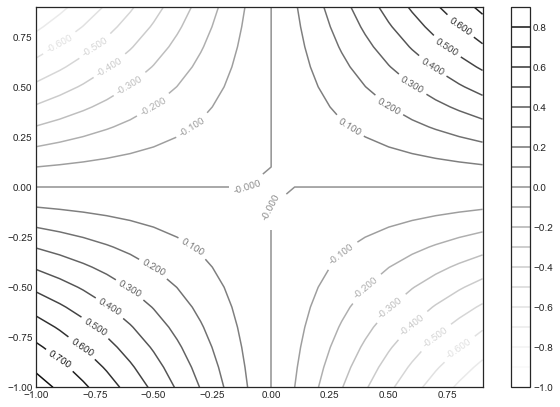

In [2]:
a = np.arange(-1, 1, .1)
X, Y = np.meshgrid(a, a)
Z = np.sin(X * Y)

CS = plt.contour(X, Y, Z, levels=a)
plt.clabel(CS, inline=2)
plt.colorbar();

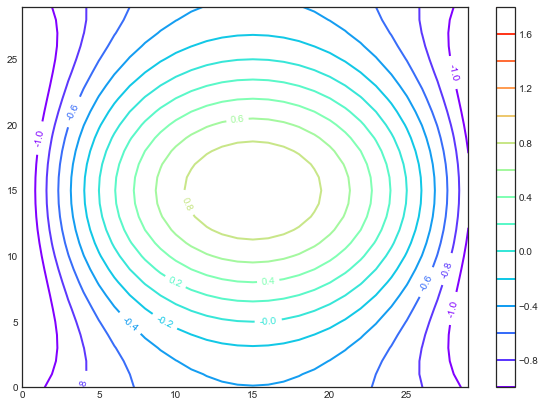

In [3]:
def f(x, y):
    return (1- (x**2 + y**2)) * np.exp(-y**2 / 2)

x = np.arange(-1.5, 1.5, 0.1)
y = np.arange(-1.5, 1.5, 0.1)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
N = np.arange(-1, 2, 0.2)

CS = plt.contour(Z, N, linewidths=2, cmap='rainbow')
plt.clabel(CS, inline=True, fmt = '%1.1f')
plt.colorbar(CS);

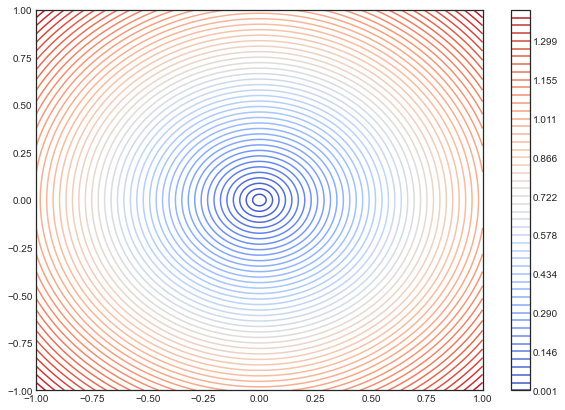

In [4]:
l = np.linspace(-1.0, 1.0, 1000)
X, Y = np.meshgrid(l,l)
Z = np.sqrt(X**2 + Y**2)
lv = np.linspace(Z.reshape(-1, 1).min(), Z.reshape(-1, 1).max(), 50)
plt.contour(X, Y, Z, levels=lv, cmap='coolwarm')
plt.colorbar();

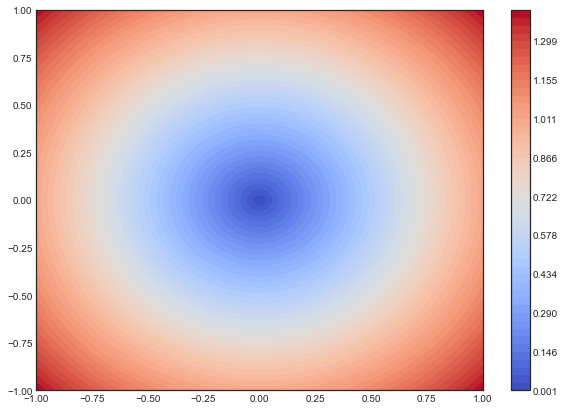

In [5]:
plt.contourf(X, Y, Z, levels=lv, cmap='coolwarm')
plt.colorbar();

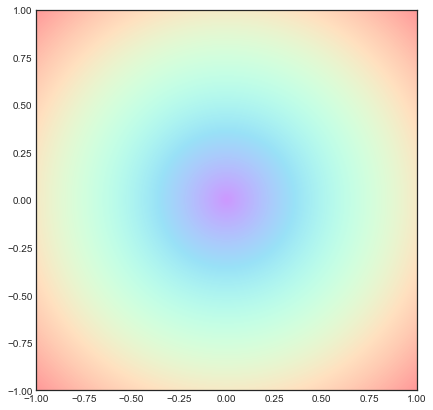

In [6]:
plt.imshow(Z, extent=[-1, 1, -1, 1], origin='lower', cmap='rainbow',alpha=0.4);
# contourf보다 더 부드럽게 하려면 imshow로 표현해야 함

## Decision Boundary 그리기

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from itertools import combinations
from matplotlib.colors import ListedColormap

In [8]:
iris = load_iris()
feature_names=['Sepal Length','Sepal Width','Petal Length','Petal Width']
model = DecisionTreeClassifier()

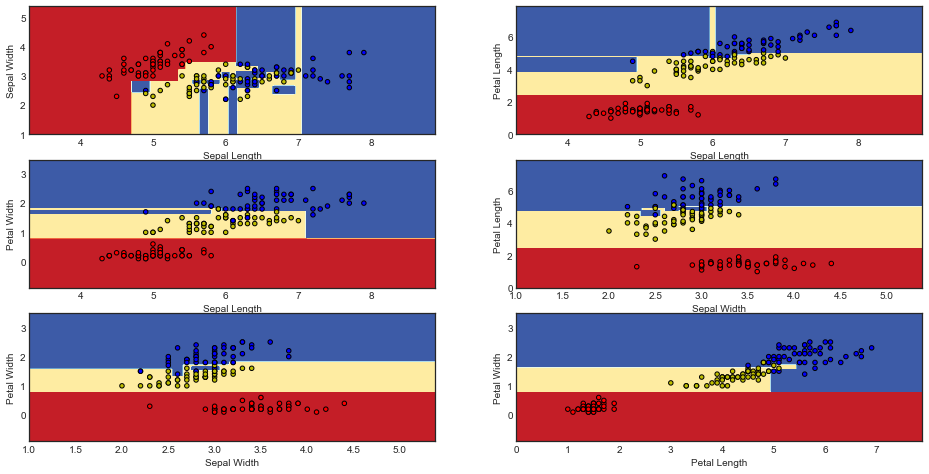

In [9]:
plt.figure(figsize=(16, 8))
plot_idx = 1

for pair in combinations([0,1,2,3], 2):
    X = iris.data[:,pair]
    y = iris.target
        
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    
    X = X[idx]
    y = y[idx]
    
    model.fit(X, y)
    
    plt.subplot(3, 2, plot_idx)
    
    x_min, x_max = X[:,0].min() -1, X[:, 0].max() + 1
    y_min, y_max = X[:,1].min() -1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:,1], c=y,
                cmap=ListedColormap(['r','y','b']), edgecolor='k',s=20)
    
    plot_idx += 1